# CovidTrackerIndia
A Linear Regression, and Polynomial Regression Model to predict the number of cases that will arise since a particular day of a pandemic.

### Gathering dataset and importing necessary modules

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df1=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data1.csv')
df1

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num Cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,NaN,NaN,16/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
17360,NaN,NaN,18/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
17361,NaN,NaN,18/04/2020,NaN,NaN,NaN,NaN,NaN,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
17362,NaN,NaN,19/04/2020,NaN,NaN,NaN,NaN,Nagpur,Maharashtra,MH,...,Correction for district count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [57]:
df2=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data2.csv')
df3=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data3.csv')
df4=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data4.csv')
df5=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data5.csv')
df6=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data6.csv')
df7=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data7.csv')
df8=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data8.csv')
df9=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data9.csv')
df10=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data10.csv')
df11=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data11.csv')
df12=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data12.csv')
df13=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data13.csv')
df14=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data14.csv')
df15=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data15.csv')
df16=pd.read_csv('https://api.covid19india.org/csv/latest/raw_data16.csv')


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17364 entries, 0 to 17363
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient Number                             17306 non-null  float64
 1   State Patient Number                       2457 non-null   object 
 2   Date Announced                             17364 non-null  object 
 3   Estimated Onset Date                       0 non-null      float64
 4   Age Bracket                                1670 non-null   object 
 5   Gender                                     3746 non-null   object 
 6   Detected City                              2166 non-null   object 
 7   Detected District                          14978 non-null  object 
 8   Detected State                             17363 non-null  object 
 9   State code                                 17363 non-null  object 
 10  Current Status        

In [59]:
df1.columns

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes', 'Num Cases'],
      dtype='object')

In [60]:
df16.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [61]:
df1=df1.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]

In [62]:
df2=df2.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df3=df3.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df4=df4.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df5=df5.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df6=df6.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df7=df7.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df8=df8.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df9=df9.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df10=df10.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df11=df11.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df12=df12.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df13=df13.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df14=df14.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df15=df15.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]
df16=df16.loc[:,['Num Cases','Date Announced','Age Bracket', 'Gender', 'Detected City','Detected District', 'Detected State', 'Current Status']]

### Merging the datasets

since we have 16 datasets in total

In [63]:
df=df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16])
df

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered
...,...,...,...,...,...,...,...,...
26620,29.0,08/10/2020,NaN,NaN,NaN,Leh,Ladakh,Recovered
26621,10.0,08/10/2020,NaN,NaN,NaN,Kargil,Ladakh,Recovered
26622,-8.0,08/10/2020,NaN,NaN,NaN,Solan,Himachal Pradesh,Migrated_Other
26623,8.0,08/10/2020,NaN,NaN,NaN,Solan,Himachal Pradesh,Recovered


### Data Cleaning

In [64]:
Date=df['Date Announced'].str.split('/',expand=True)
Date.columns=['Day','Month','Year']
Date

,Day,Month,Year
0,30,01,2020
1,02,02,2020
2,03,02,2020
3,02,03,2020
4,02,03,2020
...,...,...,...
26620,08,10,2020
26621,08,10,2020
26622,08,10,2020
26623,08,10,2020


In [65]:
df=pd.concat([df,Date],axis=1)

In [66]:
df.to_csv('CovidTrackerIndia.csv')

In [67]:
df

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,01,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,02,02,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,03,02,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,02,03,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,02,03,2020
...,...,...,...,...,...,...,...,...,...,...,...
26620,29.0,08/10/2020,NaN,NaN,NaN,Leh,Ladakh,Recovered,08,10,2020
26621,10.0,08/10/2020,NaN,NaN,NaN,Kargil,Ladakh,Recovered,08,10,2020
26622,-8.0,08/10/2020,NaN,NaN,NaN,Solan,Himachal Pradesh,Migrated_Other,08,10,2020
26623,8.0,08/10/2020,NaN,NaN,NaN,Solan,Himachal Pradesh,Recovered,08,10,2020


In [68]:
df=df.iloc[:,0:]
df.head(22)

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,01,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,02,02,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,03,02,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,02,03,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,02,03,2020
5,1.0,03/03/2020,69,M,Jaipur,Italians,Rajasthan,Recovered,03,03,2020
6,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,04,03,2020
7,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,04,03,2020
8,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,04,03,2020
9,1.0,04/03/2020,55,NaN,Gurugram,Italians,Haryana,Recovered,04,03,2020


In [69]:
days=df[df['Current Status']=='Hospitalized'].groupby(['Month','Day'])[['Num Cases']].sum()
days

Num Cases
Month Day           
03    04         5.0
      05         1.0
      07         2.0
      09         4.0
      10         4.0
...              ...
10    04     74770.0
      05     60130.0
      06     71869.0
      07     78809.0
      08     70797.0

[217 rows x 1 columns]

In [70]:
len(days)
X=np.arange(len(days))
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [71]:
y=days.values
y

array([[5.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [4.0000e+00],
       [8.0000e+00],
       [4.0000e+00],
       [6.0000e+00],
       [1.1000e+01],
       [8.0000e+00],
       [1.2000e+01],
       [1.4000e+01],
       [2.2000e+01],
       [2.1000e+01],
       [5.2000e+01],
       [6.7000e+01],
       [5.9000e+01],
       [8.2000e+01],
       [6.3000e+01],
       [7.5000e+01],
       [5.8000e+01],
       [1.4000e+02],
       [1.2300e+02],
       [1.0600e+02],
       [1.7800e+02],
       [3.0600e+02],
       [4.2300e+02],
       [4.8500e+02],
       [5.5600e+02],
       [5.7600e+02],
       [6.0600e+02],
       [4.8500e+02],
       [5.7000e+02],
       [5.6300e+02],
       [8.1200e+02],
       [8.7000e+02],
       [8.5300e+02],
       [7.5800e+02],
       [1.2430e+03],
       [1.0310e+03],
       [8.8400e+02],
       [1.0610e+03],
       [9.2200e+02],
       [1.3700e+03],
       [1.5790e+03],
       [1.2390e+03],
       [1.5370e+03],
       [1.292

In [72]:
X=X.reshape(-1,1)
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

### Splitting dataset into training and testing data for Regression

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=40)

In [75]:
len(X_train)

173

In [76]:
len(X_test)

44

### Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [96]:
y_pred = reg.predict(X_test)

### Evaluation metrics

### 1. Mean Absolute Error

In [102]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

9732.206087094262

### 2. Mean Squared Error

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

127374984.2621729

### 3. Root Mean Squared Error

In [104]:
np.sqrt(mean_squared_error(y_test,y_pred))

11286.052643071132

### 4. Root Mean Squared Log Error

In [105]:
np.log(np.sqrt(mean_squared_error(y_test,y_pred)))

9.331322962976042

### 5. R2 Score

In [107]:
from sklearn.metrics import r2_score

In [108]:
accuracy = r2_score(y_pred,y_test)
accuracy

0.8551447004846903

### Data Visualisation for Linear regression model

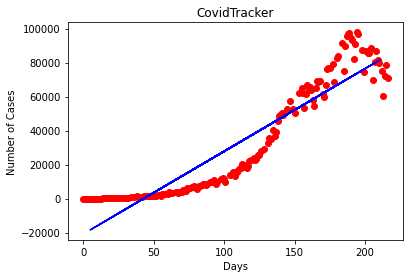

In [81]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,reg.predict(X_test),color='blue')
plt.title('CovidTracker')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.show()

### Polynomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
X_poly=poly.fit_transform(X_train)
poly.fit(X_poly,y_train)
reg_poly=LinearRegression()
reg_poly.fit(X_poly,y_train)

LinearRegression()

In [83]:
y_pred = reg_poly.predict(poly.fit_transform(X_test))

In [84]:
accuracy_poly = r2_score(y_pred,y_test)
accuracy_poly

0.9369991672721139

### Data Visualisation for Polynomial Regression model

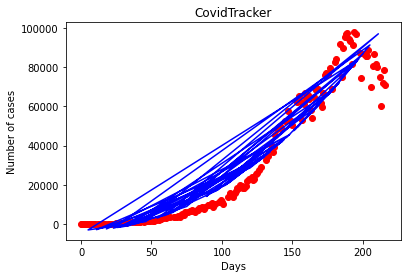

In [85]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_test,reg_poly.predict(poly.fit_transform(X_test)),color='blue')
plt.title('CovidTracker')
plt.xlabel('Days')
plt.ylabel('Number of cases')
plt.show()

On a random day, 250 in our case , let's see how many  number of cases each model predicts

In [86]:
reg.predict([[250]])

array([[100760.3188389]])

In [87]:
reg_poly.predict(poly.fit_transform([[250]]))

array([[138130.9359759]])

### Conclusion

Our Polynomial Regression model(93%) is more accurate than Linear Regression model(85%) .

### K-Fold Cross Validation

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [89]:
kfold_cv = KFold(n_splits=5, random_state=40, shuffle=True)

In [90]:
reg=LinearRegression()

In [91]:
kfold_scores = cross_val_score(reg, X, y,cv=kfold_cv)

In [92]:
kfold_scores

array([0.88186325, 0.8446349 , 0.86339094, 0.85843911, 0.8755911 ])

In [93]:
cross_validation_accuracy = np.mean(kfold_scores)

In [94]:
cross_validation_accuracy

0.8647838584513566

### Conclusion
After K-Fold Cross Validation , the mean accuracy of our Linear Regression model is 86%